# Exploratory Data Analysis

In this notebook, I will be analyzing, visually and statistically, the different features in the Heart Failure dataset
from Kaggle. I want to see how each feature impacts the likelihood of Heart Failure and uncover hidden patterns within
the data.

In [77]:
# Importing all the relevant libraries for Exploratory Data Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('Data/heart.csv',index_col=0)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [107]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,243.211559,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.430044,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [28]:
df['Sex'].value_counts()

M    724
F    193
Name: Sex, dtype: int64

In [63]:
# Now I will bucket all the Continuos features into Quartiles using qcut

df['RestingBPQuartile'] = pd.qcut(df['RestingBP'], 4, ['1Q','2Q','3Q','4Q'])
df['CholesterolQuartile'] = pd.qcut(df['Cholesterol'], 4, ['1Q','2Q','3Q','4Q'])
df['MaxHRQuartile'] = pd.qcut(df['MaxHR'], 4, ['1Q','2Q','3Q','4Q'])
df['AgeQuartile'] = pd.qcut(df['Age'], 4, ['1Q','2Q','3Q','4Q'])

In [26]:
def plotting_percentages(df, col, target):
    x, y = col, target
    
    # Temporary dataframe with percentage values
    temp_df = df.groupby(x)[y].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('percent').reset_index()

    # Sort the column values for plotting    
    order_list = list(df[col].unique())
    order_list.sort()

    # Plot the figure
    sns.set(font_scale=1.5)
    g = sns.catplot(x=x, y='percent', hue=y,kind='bar', data=temp_df, 
                    height=8, aspect=2, order=order_list, legend_out=False)
    g.ax.set_ylim(0,100)

    # Loop through each bar in the graph and add the percentage value    
    for p in g.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
        
    # Set labels and title
    plt.title(f'{col.title()} By Percent {target.title()}', 
              fontdict={'fontsize': 30})
    plt.xlabel(f'{col.title()}', fontdict={'fontsize': 20})
    plt.ylabel(f'{target.title()} Percentage', fontdict={'fontsize': 20})
    plt.xticks(rotation=75)
    return g

Text(0.5, 1.0, '% with Heart Disease among Resting BP Quartiles')

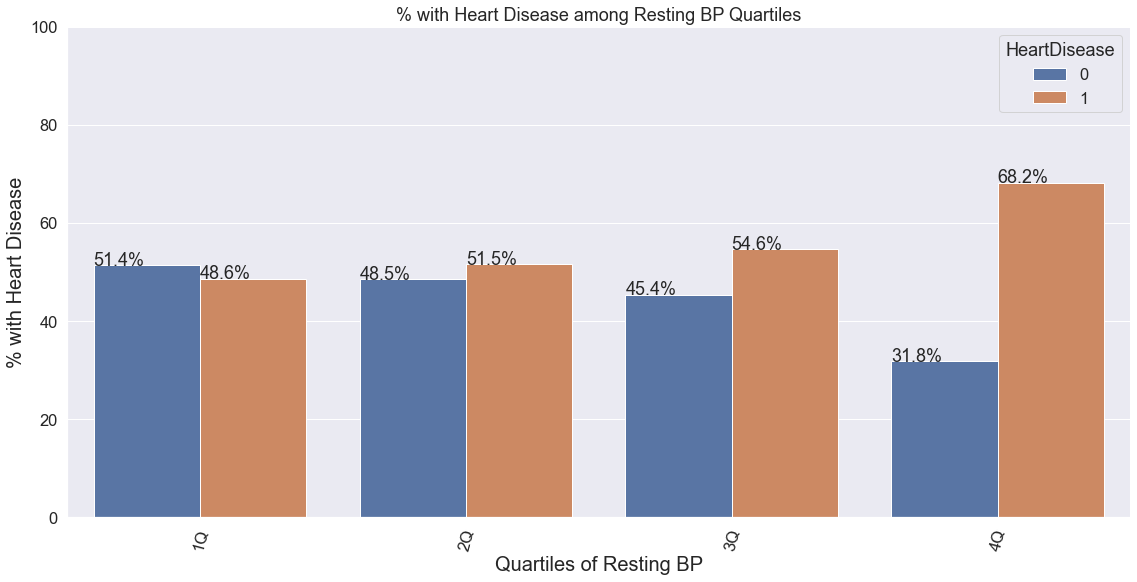

In [34]:
plotting_percentages(df, 'RestingBPQuartile', 'HeartDisease')
plt.xlabel('Quartiles of Resting BP')
plt.ylabel('% with Heart Disease')
plt.title('% with Heart Disease among Resting BP Quartiles')

237    177
223     10
220     10
230      9
216      9
219      8
234      7
225      7
215      6
224      6
236      6
233      6
218      6
222      6
226      6
221      5
228      5
231      5
235      5
229      4
217      4
227      4
232      3
Name: Cholesterol, dtype: int64


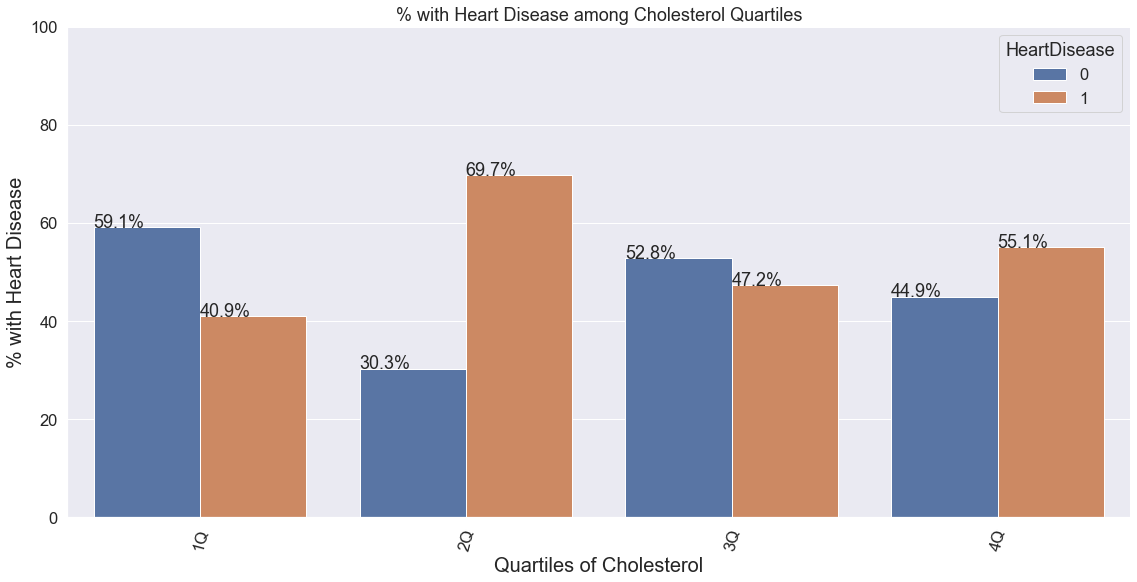

In [46]:
plotting_percentages(df, 'CholesterolQuartile', 'HeartDisease')
plt.xlabel('Quartiles of Cholesterol')
plt.ylabel('% with Heart Disease')
plt.title('% with Heart Disease among Cholesterol Quartiles')
df2 = df.loc[df['CholesterolQuartile'] == '2Q', 'Cholesterol']
print(df2.value_counts(sort=True))

120    36
110    23
115    16
100    14
112    13
118    12
105    11
98      9
116     9
108     8
99      7
96      7
92      6
117     6
114     6
106     5
119     5
113     5
109     5
111     5
86      4
94      4
102     4
103     4
82      3
90      3
84      3
97      3
80      2
88      2
93      2
72      2
95      2
104     2
63      1
83      1
60      1
70      1
67      1
78      1
77      1
91      1
107     1
69      1
87      1
73      1
71      1
Name: MaxHR, dtype: int64
160    25
170    20
162    13
165    11
180    10
175    10
172    10
163    10
168     8
158     8
157     7
161     7
173     7
174     7
178     6
179     6
182     6
169     6
159     5
166     5
171     4
184     4
164     4
185     4
186     2
167     2
181     2
188     2
176     2
190     2
177     1
192     1
195     1
194     1
187     1
202     1
Name: MaxHR, dtype: int64


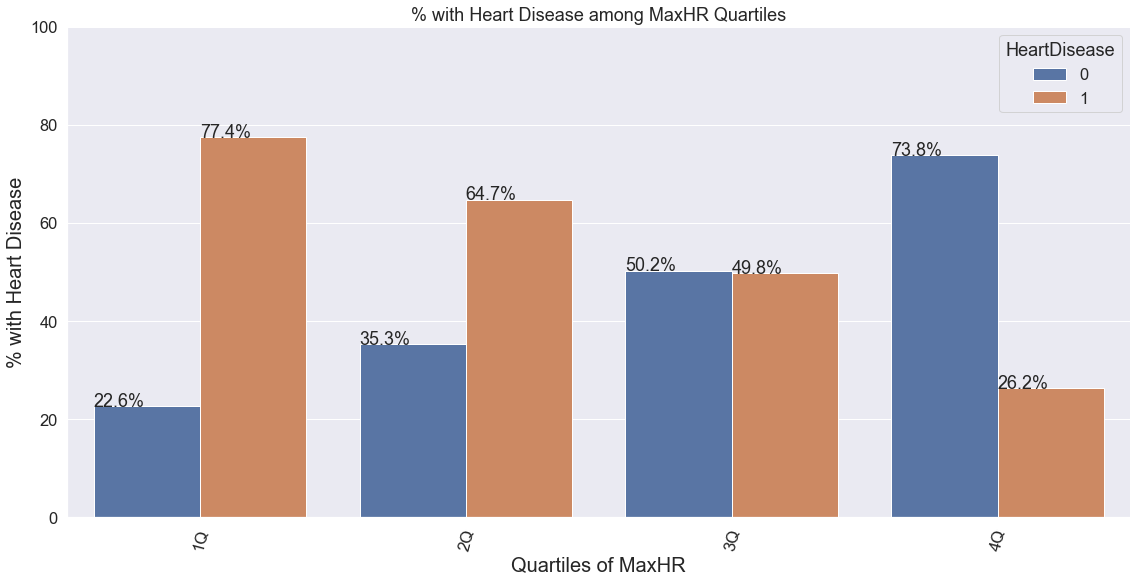

In [48]:
plotting_percentages(df, 'MaxHRQuartile', 'HeartDisease')
plt.xlabel('Quartiles of MaxHR')
plt.ylabel('% with Heart Disease')
plt.title('% with Heart Disease among MaxHR Quartiles')
df3 = df.loc[df['MaxHRQuartile'] == '1Q', 'MaxHR']
print(df3.value_counts(sort=True))
df4 = df.loc[df['MaxHRQuartile'] == '4Q', 'MaxHR']
print(df4.value_counts(sort=True))

Text(0.5, 1.0, '% with Heart Disease based on whether they experience ExerciseAngina')

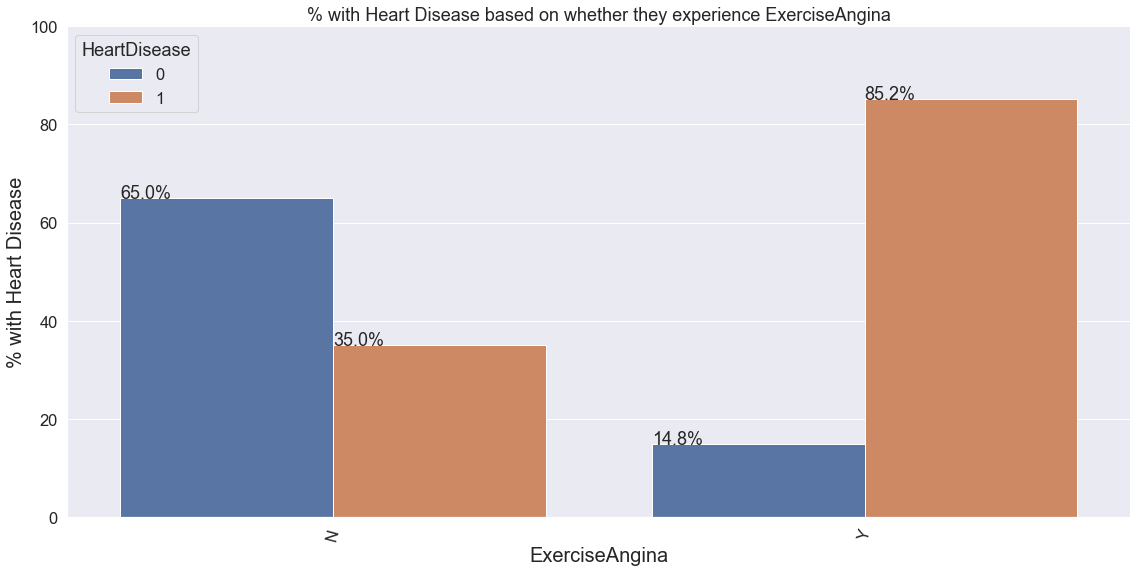

In [62]:
# I want to see how values for each feature are spread for having heart disease and not having heart disease

# sns.catplot(x='ExerciseAngina',data=df, kind='count', hue='HeartDisease', height=5, aspect=2)
# plt.title('Count of participants with and without Exercise Angina')

plotting_percentages(df, 'ExerciseAngina', 'HeartDisease')
plt.xlabel('ExerciseAngina')
plt.ylabel('% with Heart Disease')
plt.title('% with Heart Disease based on whether they experience ExerciseAngina')

Text(0.5, 1.0, '% with Heart Disease among types of Chest Pain')

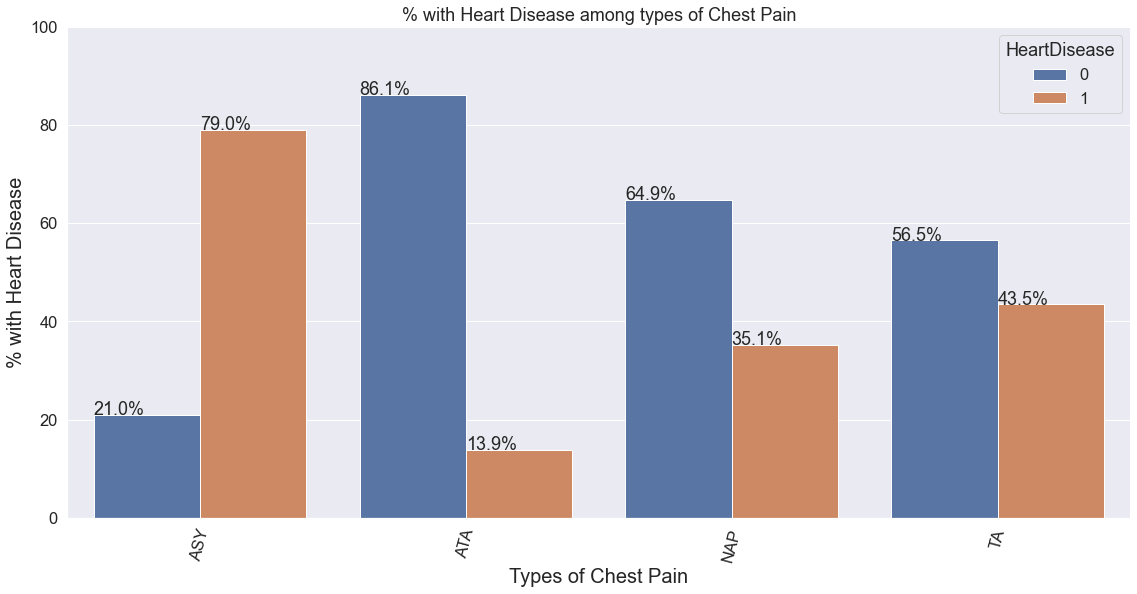

In [52]:
# The chart to the left shows that people that expeirence ExerciseAngina have a higher likelihood of having
# heart disease
plotting_percentages(df, 'ChestPainType', 'HeartDisease')
plt.xlabel('Types of Chest Pain')
plt.ylabel('% with Heart Disease')
plt.title('% with Heart Disease among types of Chest Pain')

In [ ]:
# We can see above that Men/Women that experience Asymptomatic Chest pain have a higher likelihood of having disease

In [54]:
with_hd = df[df['HeartDisease'] == 1].count()
without_hd = df[df['HeartDisease'] == 0].count()
# I learned that there are 507 with HD in this entire dataset and 410 without HD
percent_with_hd = with_hd/(without_hd+with_hd)
print(percent_with_hd)

#About 55% of this data set has Heart Disease, there is a slight imbalance favoring people with HD

Age                    0.55289
Sex                    0.55289
ChestPainType          0.55289
RestingBP              0.55289
Cholesterol            0.55289
FastingBS              0.55289
RestingECG             0.55289
MaxHR                  0.55289
ExerciseAngina         0.55289
Oldpeak                0.55289
ST_Slope               0.55289
HeartDisease           0.55289
RestingBPQuartile      0.55289
CholesterolQuartile    0.55289
MaxHRQuartile          0.55289
dtype: float64


62    35
61    31
63    30
64    22
65    21
67    15
66    13
69    13
68    10
74     7
70     7
71     5
72     4
75     3
77     2
76     2
73     1
Name: Age, dtype: int64


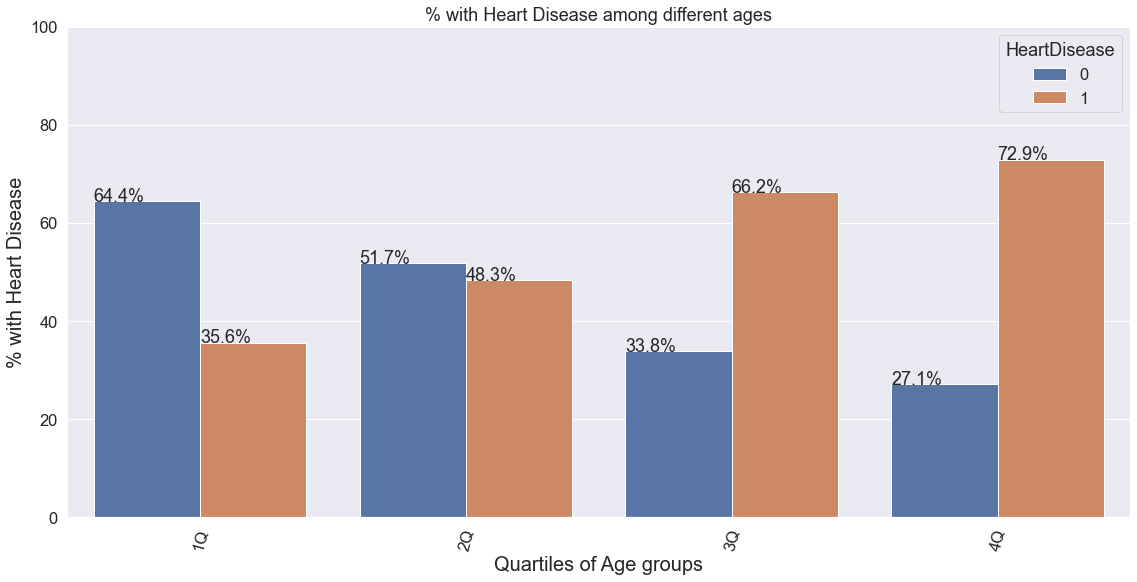

In [66]:
plotting_percentages(df, 'AgeQuartile', 'HeartDisease')
plt.xlabel('Quartiles of Age groups')
plt.ylabel('% with Heart Disease')
plt.title('% with Heart Disease among different ages')

age = df.loc[df['AgeQuartile'] == '4Q', 'Age']
print(age.value_counts(sort=True))

In [ ]:
The data above is not normally distributed, the likelihood of NOT having heart disease is skewed towards the left tail
Middle aged people are more likely to have heart disease than younger or older men

Text(0.5, 1.0, '% with Heart Disease based on FastingBS')

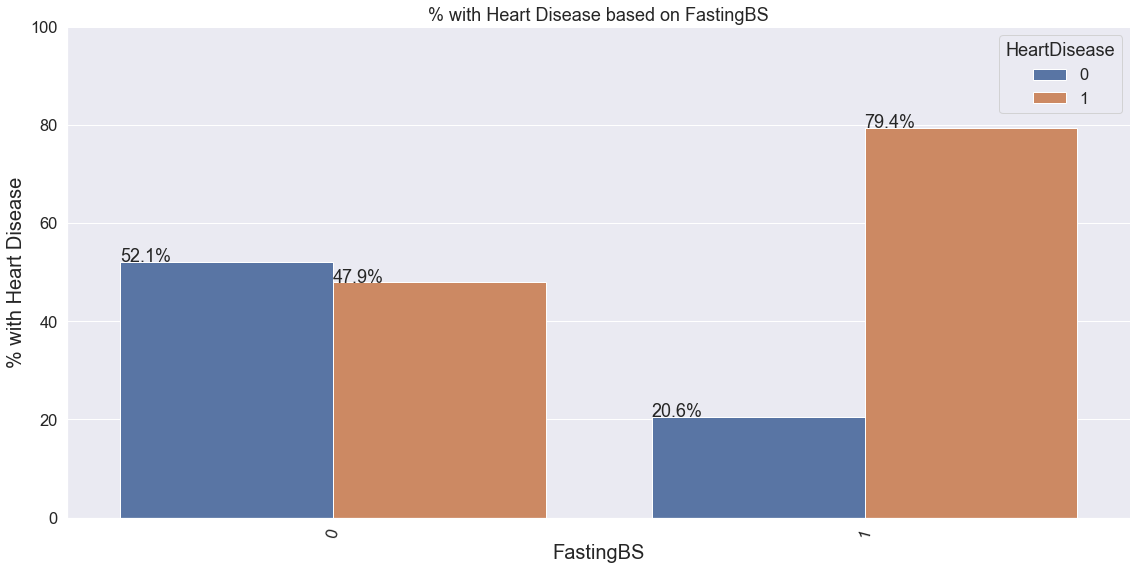

In [58]:
plotting_percentages(df, 'FastingBS', 'HeartDisease')
plt.xlabel('FastingBS')
plt.ylabel('% with Heart Disease')
plt.title('% with Heart Disease based on FastingBS')

In [ ]:
Fasting blood sugar level above 120 mg/dl (characterized as 1 on the x-axis) has a high correlation with having HD

Text(0.5, 1.0, '% with Heart Disease based on RestingECG')

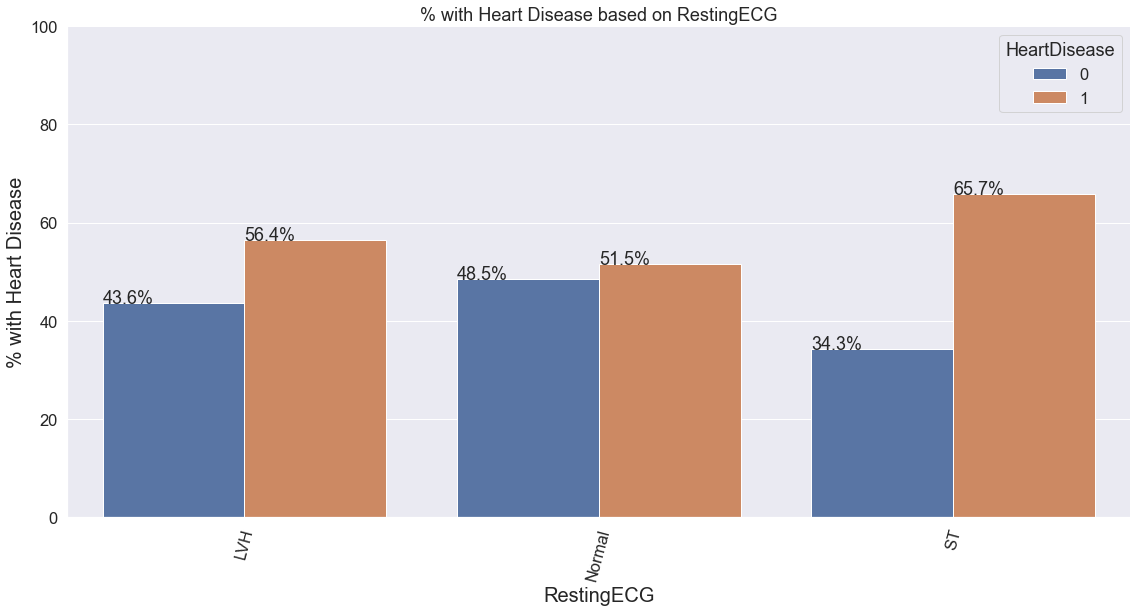

In [60]:
plotting_percentages(df, 'RestingECG', 'HeartDisease')
plt.xlabel('RestingECG')
plt.ylabel('% with Heart Disease')
plt.title('% with Heart Disease based on RestingECG')

In [ ]:
Proportinally, Resting ECG doesn't seem to be a tell on whether Men or Women have Heart Disease

Text(0.5, 1.0, '% with Heart Disease based on ST_Slope')

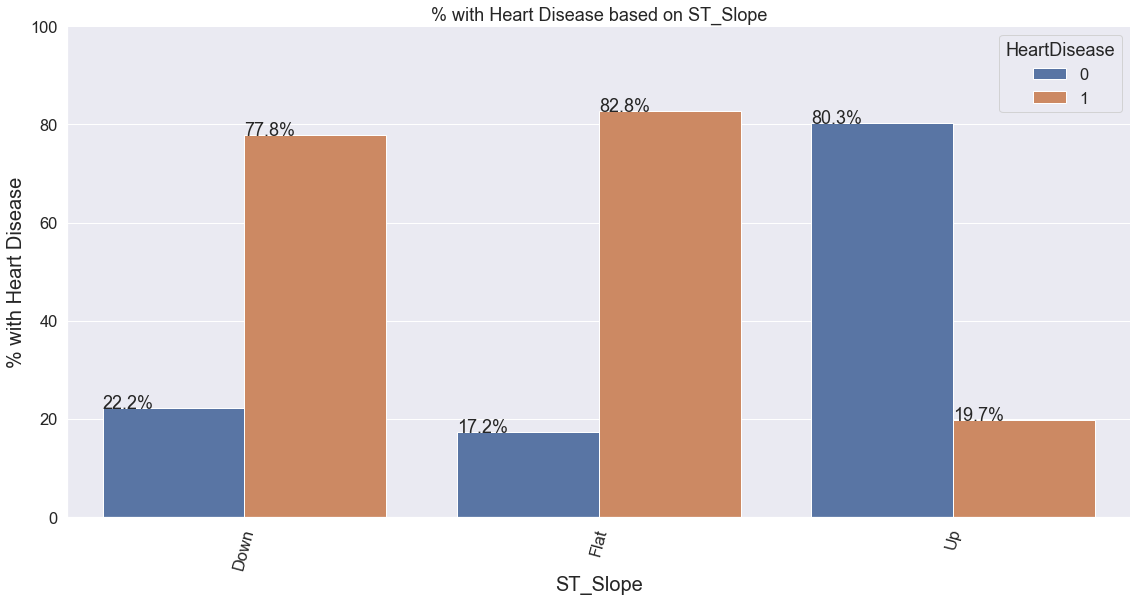

In [61]:
plotting_percentages(df, 'ST_Slope', 'HeartDisease')
plt.xlabel('ST_Slope')
plt.ylabel('% with Heart Disease')
plt.title('% with Heart Disease based on ST_Slope')

In [191]:
This is the most telling chart so far, people with a Flat or Downward ST Slope are more likely to have Heart Disease vs
people with an upward ST Slope
This is something to keep an eye on going forward

In [197]:
# sex_HD_mean = df.groupby('Sex')['HeartDisease'].mean()
# sex_HD_mean

plotting_percentages(df, 'Sex', 'HeartDisease')
plt.xlabel('ST_Slope')
plt.ylabel('% with Heart Disease')
plt.title('% with Heart Disease based on ST_Slope')

Sex
F    0.259067
M    0.631215
Name: HeartDisease, dtype: float64

In [ ]:
Simply based on the averages (before further analysis), it looks like men have 60% more chance of having heart 
disease vs Women 

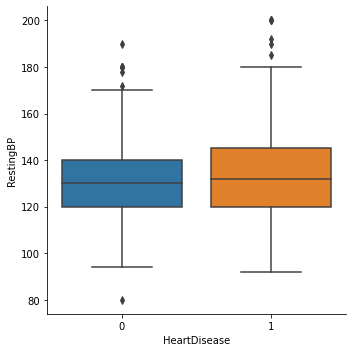

In [202]:
sns.catplot(x='HeartDisease',y='RestingBP',data=df, kind='box')

In [ ]:
The Median for RestingBP is about the same for groups with and without Heart Disease but the IQR range is larger
for people with Heart Disease. The minimum floor is lower and maximum floor is higher for people w HD as well.

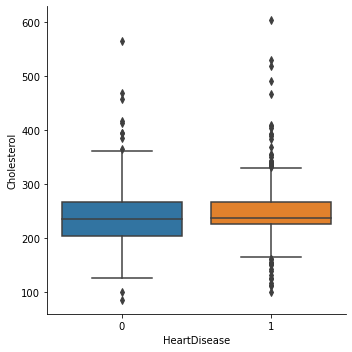

In [203]:
sns.catplot(x='HeartDisease',y='Cholesterol',data=df, kind='box')

In [ ]:
The 'Cholesterol' IQR range is much smaller for people with HD vs people without HD.
But, there are significantly more outliers in 'Cholesterol' for people with HD

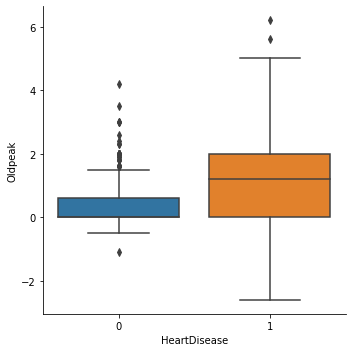

In [205]:
sns.catplot(x='HeartDisease',y='Oldpeak',data=df, kind='box')

In [ ]:
Regarding the ST depression, the IQR, minimum, and maximum for the people with heart disease is a much higher range
vs without people without heart disease. The median calculate ST Depression is higher than for people with heart
disease vs people without. 

ST depression value less than 0.5 is considered normal, which explains why the IQR for no HD is so close to 0.

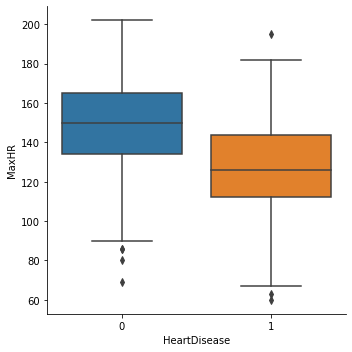

In [206]:
sns.catplot(x='HeartDisease',y='MaxHR',data=df, kind='box')

In [ ]:
Regarding the maximum HR, the IQR, minimum, and maximum for the people with heart disease is a much lower range
vs without people without heart disease. This could be explained by the fact that the heart of people without heart
disease functions better than the people without, on average. 

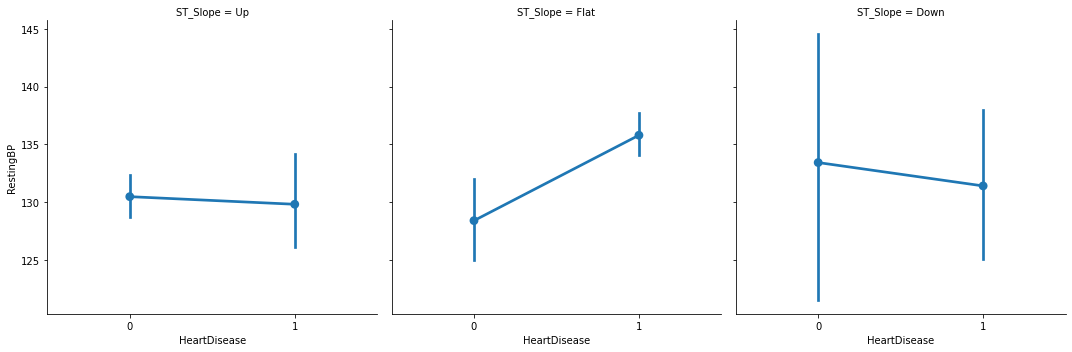

In [210]:
sns.catplot(x='HeartDisease', y='RestingBP', data=df, kind='point', col='ST_Slope')

In [ ]:
The chart in the middle shows a significant data point, people with a higher resting blood pressure and Flat ST slope 
tend to have heart disease. The bottom of the 95% confidence interval for Flat ST_slope for people with a heart disease
is higher than the top the of 95% confidence interval for people with a Flat st_slope.

<AxesSubplot:>

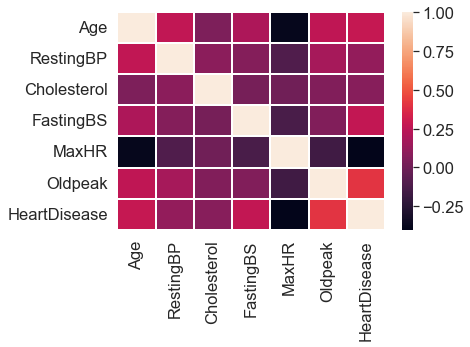

In [74]:
sns.heatmap(df.corr(),linewidths=.05)

In [ ]:
The quantitative data doesn't show any strong correlations either positively or negatively.

I will use the Cramers_V to find correlations within the Categorical Variables

In [259]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [260]:
cramers_v(df['ST_Slope'],df['HeartDisease'])

0.6209180557213002

Since the Degrees of Freedom is 1 (min of 2 columns - 1), this is a statistically significant correlation

In [264]:
cramers_v(df['ChestPainType'],df['HeartDisease'])

0.5387731692972357

In [ ]:
With DOF of 1, 0.53 is a statistically significant association between these 2 variables

In [266]:
cramers_v(df['RestingECG'],df['HeartDisease'])

0.09949306019187394

In [ ]:
Similar to the RestingECG catplot, there is no correlation between RestingECG and HeartDisease

In [270]:
cramers_v(df['ExerciseAngina'],df['HeartDisease'])

0.4924167071256221

In [ ]:
Strong correlation between having Heart Disease and Exercise Angina, as expected based on the catplot from earlier

In [276]:
cramers_v(df['FastingBS'],df['HeartDisease'])

0.2634800809276752

In [ ]:
This correlation isn't as strong as expected based on the Catplot from earlier.

In [79]:
new_df = pd.get_dummies(df)
new_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


[Text(0, 0, '0.002'),
 Text(0, 0, '0.003'),
 Text(0, 0, '0.003'),
 Text(0, 0, '0.006'),
 Text(0, 0, '0.007'),
 Text(0, 0, '0.007'),
 Text(0, 0, '0.008'),
 Text(0, 0, '0.011'),
 Text(0, 0, '0.012'),
 Text(0, 0, '0.013'),
 Text(0, 0, '0.02'),
 Text(0, 0, '0.021'),
 Text(0, 0, '0.023'),
 Text(0, 0, '0.06'),
 Text(0, 0, '0.068'),
 Text(0, 0, '0.081'),
 Text(0, 0, '0.086'),
 Text(0, 0, '0.098'),
 Text(0, 0, '0.105'),
 Text(0, 0, '0.365')]

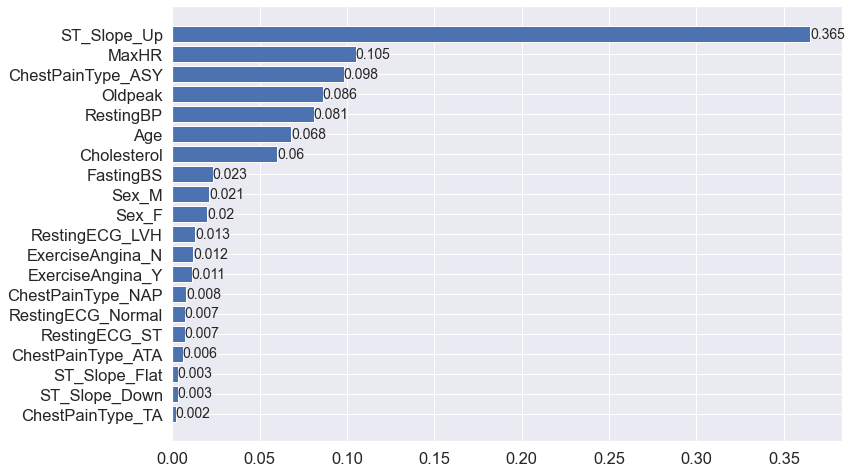

In [111]:
# Random Forest Regressor for finding the most important features
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

y = new_df['HeartDisease']
X = new_df.drop('HeartDisease', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
# plt.barh(X.columns[rf.feature_importances_.argsort()], rf.feature_importances_[rf.feature_importances_.argsort()])
rounded = np.around(rf.feature_importances_,3)

fig, ax = plt.subplots()
bars = ax.barh(X.columns[rounded.argsort()], rounded[rounded.argsort()])
ax.bar_label(bars)

In [ ]:
I one-hot encoded all of the categorical variables and ran a Random Forest Regressor to find the most 
important features in the data set that impact Heart Disease. As seen in the data below, upward facing ST Slop, 
Max HR, and ASY Chest pain are the three most important features for predicting heart rate. I am surprised to see 
that Flat and Downward ST SLops are at the bottom of the chart even though percentage wise they were very telling 
on whether a person has heart disease or not.


# Conclusion

In [ ]:
The most important conclusion seen from the Exploratory Data Analysis is people with a 'Flat' or 'Down' ST slope
and people with 'Asymptotic' Chest Pain have the highest chance of having a Heart Disease.

We also noticed that people that experience Exercise Angina tend to have heart disease,
this is the same for people that have a Fasting Blood Sugar above 120 mg/dl.

Resting ECG doesn't tell us much about whether or not a person has heart disease.

Middle Aged Men are the most likely to have Heart Disease based on the data.
